In [1]:
import json
import torch
import re

### Checking all scenes and all dialogue objects (\<OBJ>) are in the img_embedding dict from UNITER

In [6]:
with open("./data_object_special/simmc2_scenes_train.txt", 'r') as f:
    train_scenes = json.load(f)

with open("./data_object_special/simmc2_dials_dstc10_train_predict.txt", 'r') as f:
    train_data = f.readlines()

print(len(train_scenes))
print(len(train_data))

38127
38127


In [14]:
with open("./data_object_special/simmc2_scenes_devtest.txt", 'r') as f:
    devtest_scenes = json.load(f)

with open("./data_object_special/simmc2_dials_dstc10_devtest_predict.txt", 'r') as f:
    devtest_data = f.readlines()

print(len(devtest_scenes))
print(len(devtest_data))

8609
8609


In [7]:
CORRUPTED_IMGS = ['cloth_store_1416238_woman_4_8', 'm_cloth_store_1416238_woman_20_6', 'cloth_store_1416238_woman_20_6', 'cloth_store_1416238_woman_19_0']

img_feat = torch.load("./data_object_special/img_features.pt", map_location='cpu')

In [11]:
for idx,line in enumerate(train_data):
    if train_scenes[idx] not in CORRUPTED_IMGS:
        l1 = len([m.start() for m in re.finditer('<OBJ>', line)])
        l2 = len(img_feat[train_scenes[idx]+'_scene'].keys())-1
        if l1!=l2:
            print(line)
            break

In [15]:
for idx,line in enumerate(devtest_data):
    if devtest_scenes[idx] not in CORRUPTED_IMGS:
        l1 = len([m.start() for m in re.finditer('<OBJ>', line)])
        l2 = len(img_feat[devtest_scenes[idx]+'_scene'].keys())-1
        if l1!=l2:
            print(line)
            break

In [16]:
CORRUPTED_IMGS = ['cloth_store_1416238_woman_4_8', 'm_cloth_store_1416238_woman_20_6', 'cloth_store_1416238_woman_20_6', 'cloth_store_1416238_woman_19_0']

img_feat = torch.load("./data_object_special/img_features.pt", map_location='cpu')

In [35]:
with open('./data_object_special/simmc2_scenes_train.txt', 'r') as f:
    train_scenes = json.load(f)

with open('./data_object_special/simmc2_scenes_dev.txt', 'r') as f:
    dev_scenes = json.load(f)

with open('./data_object_special/simmc2_scenes_devtest.txt', 'r') as f:
    devtest_scenes = json.load(f)

In [39]:
def check_scenes(data):
    for scene in data:
        if scene not in CORRUPTED_IMGS:
            if scene+'_scene' not in img_feat:
                print(scene+'_scene')
                break

print("Train...")
check_scenes(train_scenes)
print("Dev...")
check_scenes(dev_scenes)
print("Devtest...")
check_scenes(devtest_scenes)

Train...
Dev...
Devtest...


### Count dialogues

In [2]:
with open("./data/simmc2_dials_dstc10_train.json", 'r') as f:
    train_data =json.load(f)

with open("./data/simmc2_dials_dstc10_dev.json", 'r') as f:
    dev_data =json.load(f)

with open("./data/simmc2_dials_dstc10_devtest.json", 'r') as f:
    devtest_data =json.load(f)

In [8]:
def calc_stats(data):
    n_total = 0
    n_fash = 0
    n_furn = 0

    for dial in data['dialogue_data']:
        n_total += 1
        if dial['domain'] == 'fashion':
            n_fash += 1
        else:
            n_furn += 1
        
    return n_total, n_fash, n_furn

n_total_train, n_fash_train, n_furn_train = calc_stats(train_data)
n_total_dev, n_fash_dev, n_furn_dev = calc_stats(dev_data)
n_total_devtest, n_fash_devtest, n_furn_devtest = calc_stats(devtest_data)

print(n_total_train, n_fash_train, n_furn_train)
print(n_total_dev, n_fash_dev, n_furn_dev)
print(n_total_devtest, n_fash_devtest, n_furn_devtest)
print(n_total_train + n_total_dev + n_total_devtest)
print(n_fash_train + n_fash_dev + n_fash_devtest)
print(n_furn_train + n_furn_dev + n_furn_devtest)

7307 4667 2640
563 563 0
1687 1172 515
9557
6402
3155


### Fixing script to get BART examples splitting from UNITER splitting

In [155]:
with open("./data_object_special/simmc2_dials_dstc10_train_predict.txt", 'r') as f:
    train_pred_data = f.readlines()

print(len(train_pred_data))

fash = 0
furn = 0
for line in train_pred_data:
    k = line.find("<@")
    if line[k+2] == '1':
        fash +=1
    elif line[k+2] == '2':
        furn +=1
    else:
        print("Error:", line)
print(fash, furn, fash+furn)

# Out of domain is well built

38127
27567 10560 38127


In [156]:
STORE_BASE_PATH = "./data_object_special/new_datasets/"
REF_SETS_BASE_PATH = STORE_BASE_PATH+"reference_sets"

TRAIN_PRED_PROCESSED_PATH = "./data_object_special/simmc2_dials_dstc10_train_predict.txt"
TRAIN_TARGET_PROCESSED_PATH = "./data_object_special/simmc2_dials_dstc10_train_target.txt"

DEV_PRED_PROCESSED_PATH = "./data_object_special/simmc2_dials_dstc10_dev_predict.txt"
DEV_TARGET_PROCESSED_PATH = "./data_object_special/simmc2_dials_dstc10_dev_target.txt"

DEVTEST_PRED_PROCESSED_PATH = "./data_object_special/simmc2_dials_dstc10_devtest_predict.txt"
DEVTEST_TARGET_PROCESSED_PATH = "./data_object_special/simmc2_dials_dstc10_devtest_target.txt"

OUT_DOMAIN_REF_PATH = REF_SETS_BASE_PATH + "/out_of_domain_test.json"
IN_DOMAIN_HELD_OUT_REF_PATH = REF_SETS_BASE_PATH + "/in_domain_held_out_test.json"
IN_DOMAIN_REF_PATH = REF_SETS_BASE_PATH + "/in_domain_test.json"
TRAIN_REF_PATH = REF_SETS_BASE_PATH + "/seen_unseen_OOD_train.json"

OUT_DOMAIN_PRED_STORE_PATH = STORE_BASE_PATH + "/out_of_domain_predict.txt"
OUT_DOMAIN_TARGET_STORE_PATH = STORE_BASE_PATH + "/out_of_domain_target.txt"

IN_DOMAIN_HELD_OUT_PRED_STORE_PATH = STORE_BASE_PATH + "/in_domain_held_out_predict.txt"
IN_DOMAIN_HELD_OUT_TARGET_STORE_PATH = STORE_BASE_PATH + "/in_domain_held_out_target.txt"

IN_DOMAIN_PRED_STORE_PATH = STORE_BASE_PATH + "/in_domain_predict.txt"
IN_DOMAIN_TARGET_STORE_PATH = STORE_BASE_PATH + "/in_domain_target.txt"

TRAIN_PRED_STORE_PATH = STORE_BASE_PATH + "/train_seen_unseen_OOD_predict.txt"
TRAIN_TARGET_STORE_PATH = STORE_BASE_PATH + "/train_seen_unseen_OOD_target.txt"


In [157]:
def get_all_fashion_examples(predict_path_list, target_path_list):
    all_predict_ex = []
    all_target_ex = []

    assert len(predict_path_list) == len(target_path_list)

    for i in range(len(predict_path_list)):
        with open(target_path_list[i], 'r') as f:
            target_data = f.readlines()
        
        with open(predict_path_list[i], 'r') as f:
            for line_idx, line in enumerate(f.readlines()):
                if len(line) > 1:
                    idx = line.find("<@")
                    if line[idx+2] == '1': # fashion example
                        all_predict_ex.append(line)
                        all_target_ex.append(target_data[line_idx])

    return all_predict_ex, all_target_ex

In [158]:
pred_path_list = [TRAIN_PRED_PROCESSED_PATH, DEV_PRED_PROCESSED_PATH, DEVTEST_PRED_PROCESSED_PATH]
target_path_list = [TRAIN_TARGET_PROCESSED_PATH, DEV_TARGET_PROCESSED_PATH, DEVTEST_TARGET_PROCESSED_PATH]
all_fash_pred_ex, all_fash_target_ex = get_all_fashion_examples(pred_path_list, target_path_list)

print(len(all_fash_pred_ex), len(all_fash_target_ex))

37610 37610


In [228]:
def _get_last_sys_turn(line):
    check = line.find("<@")
    idx_sys = line.rfind('System :')
    if check == -1: # UNITER MODEL
        idx_som = line.rfind(' System mentions :')
        if idx_som == -1 or idx_som < idx_sys:
            idx_som = line.rfind(' User :')

    else: # BART MODEL
        idx_som = line.rfind(' <SOM>')
    
    if idx_sys != -1 and idx_som != -1:
        return line[idx_sys+len('System : '):idx_som]
    if idx_sys != -1:
        return line[idx_sys+len('System : '):]
    return -1


def _get_last_user_turn(line):
    idx_usr = line.rfind('User :')
    idx_soo = line.find(' <SOO>')
    if idx_soo != -1:
        return line[idx_usr+len('User : '):idx_soo]
    return line[idx_usr+len('User : '):]


def _get_line_object_ids(line):
    line_ids = []
    pos = 0
    idx = line.find("<@", pos)
    while idx != -1:
        # get absolute object ID
        abs_id = line[idx+3:idx+6]
        line_ids.append(int(abs_id)+1)
        # update pos and idx
        pos = idx+4
        idx = line.find("<@", pos)
    return line_ids


from tqdm import tqdm

def get_examples_given_ref(ref_path, all_fash_pred_examples, all_fash_target_examples):
    with open(ref_path, 'r') as f:
        ref_data = json.load(f)
    
    pred_examples = []
    target_examples = []

    for line in tqdm(ref_data):
        check = False
        aux_list = []
        last_user_turn = _get_last_user_turn(line['dial'])
        last_sys_turn = _get_last_sys_turn(line['dial'])
        KB_ids = line['KB_ids']
        temp_pred = []
        temp_target = []
        for idx, example in enumerate(all_fash_pred_examples):
            if last_user_turn == _get_last_user_turn(example) and last_sys_turn == _get_last_sys_turn(example):
                aux_list.append((example, idx))
                if set(sorted(_get_line_object_ids(example))) <= set(sorted(KB_ids)):
                    check = True
                    temp_pred.append(example)
                    temp_target.append(all_fash_target_examples[idx])
                    #pred_examples.append(example)
                    #target_examples.append(all_fash_target_examples[idx])
        if not check and len(aux_list) == 1:
            pred_examples.append(aux_list[0][0])
            target_examples.append(all_fash_target_examples[aux_list[0][1]])
            continue
        if len(temp_pred) > 1:
            if 'bad image' in last_user_turn:
                continue
            print("Warning: skipping", len(temp_pred), "examples")
            continue
            """
            print("COUNTER")
            print(last_user_turn)
            print(last_sys_turn)
            print(line['dial'])
            print(line['dial_idx'])
            print(line['KB_ids'])
            break
            """
        if not check:
            print(last_user_turn)
            print(last_sys_turn)
            print(line['dial'])
            print(line['KB_ids'])
            print("CHECK ERROR")
            break
        pred_examples += temp_pred
        target_examples += temp_target
    
    return pred_examples, target_examples

In [230]:
in_dom_held_out_predict, in_dom_held_out_target = get_examples_given_ref(IN_DOMAIN_HELD_OUT_REF_PATH, all_fash_pred_ex, all_fash_target_ex)

print(len(in_dom_held_out_predict), len(in_dom_held_out_target))

 73%|███████▎  | 6999/9567 [04:38<01:41, 25.31it/s]

 84%|████████▍ | 8058/9567 [05:20<00:59, 25.23it/s]

 89%|████████▉ | 8529/9567 [05:38<00:41, 25.13it/s]

100%|██████████| 9567/9567 [06:20<00:00, 25.16it/s]

9558 9558


In [231]:
in_dom_predict, in_dom_target = get_examples_given_ref(IN_DOMAIN_REF_PATH, all_fash_pred_ex, all_fash_target_ex)

print(len(in_dom_predict), len(in_dom_target))

  2%|▏         | 144/9000 [00:05<05:51, 25.23it/s]

  6%|▌         | 498/9000 [00:19<05:36, 25.27it/s]

 18%|█▊        | 1602/9000 [01:03<04:53, 25.19it/s]

 23%|██▎       | 2079/9000 [01:22<04:36, 25.04it/s]

 42%|████▏     | 3762/9000 [02:29<03:28, 25.13it/s]

 67%|██████▋   | 6048/9000 [04:00<01:57, 25.14it/s]

 99%|█████████▉| 8937/9000 [05:55<00:02, 25.18it/s]

100%|██████████| 9000/9000 [05:57<00:00, 25.16it/s]

8987 8987


In [232]:
train_predict, train_target = get_examples_given_ref(TRAIN_REF_PATH, all_fash_pred_ex, all_fash_target_ex)

print(len(train_predict), len(train_target))

 23%|██▎       | 3375/14641 [02:13<07:24, 25.32it/s]

 69%|██████▉   | 10131/14641 [06:41<02:59, 25.08it/s]

100%|██████████| 14641/14641 [09:41<00:00, 25.20it/s]

14633 14633


## Count number of candidate objects

In [5]:
with open('./data_object_special/simmc2_dials_dstc10_train_predict.txt', 'r') as f:
    train_data = f.readlines()

with open('./data_object_special/simmc2_dials_dstc10_dev_predict.txt', 'r') as f:
    dev_data = f.readlines()

with open('./data_object_special/simmc2_dials_dstc10_devtest_predict.txt', 'r') as f:
    devtest_data = f.readlines()

In [8]:
with open('./data_object_special/new_datasets/train_seen_unseen_OOD_predict.txt', 'r') as f:
    train_cd_data = f.readlines()

with open('./data_object_special/new_datasets/in_domain_predict.txt', 'r') as f:
    indom_data = f.readlines()

with open('./data_object_special/new_datasets/in_domain_held_out_predict.txt', 'r') as f:
    idho_data = f.readlines()

with open('./data_object_special/new_datasets/out_of_domain_predict.txt', 'r') as f:
    ood_data = f.readlines()

### Added:
with open('./data_object_special/new_datasets/all_furniture_predict.txt', 'r') as f:
    all_furn_data = f.readlines()

with open('./data_object_special/new_datasets/devtest_only_fashion_predict.txt', 'r') as f:
    devtest_only_fash_data = f.readlines()

with open('./data_object_special/new_datasets/devtest_only_furniture_predict.txt', 'r') as f:
    devtest_only_furn_data = f.readlines()


In [30]:
import numpy as np

def count_mean_objs(data):
    n_objs = []
    for line in data:
        n = 0
        pos = line.find('<OBJ>')
        while pos != -1:
            n += 1
            pos = line.find('<OBJ>', pos+1)
        pos = line.find('<PREVIOBJ>')
        while pos != -1:
            n += 1
            pos = line.find('<PREVIOBJ>', pos+1)
        n_objs.append(n)
    return np.mean(n_objs), np.std(n_objs)

In [31]:
print(count_mean_objs(train_data)[0])
print(count_mean_objs(dev_data)[0])
print(count_mean_objs(devtest_data)[0])

print(count_mean_objs(train_cd_data)[0])
print(count_mean_objs(indom_data)[0])
print(count_mean_objs(idho_data)[0])
print(count_mean_objs(ood_data)[0])


print(count_mean_objs(devtest_only_fash_data)[0])
print(count_mean_objs(devtest_only_furn_data)[0])
print(count_mean_objs(all_furn_data)[0])

24.22089333018596
31.029765311963367
25.475316529213615
32.880954008063966
32.504006231916314
24.012662201758058
9.039772727272727
30.66620858146282
8.972815533980583
9.028843106180666


In [22]:
print(count_mean_objs(train_data)[0])
print(count_mean_objs(dev_data)[0])
print(count_mean_objs(devtest_data)[0])
print(count_mean_objs(indom_data)[0])
print(count_mean_objs(idho_data)[0])


22.558003514569727
31.029765311963367
24.267510744569638
31.07144446917427
20.941816659690247


The average number of objects per scene in the 'in domain' dataset is around 31, but the mean number of items per scene in the 'in domain held out' dataset is around 20.

Examples: cloth_store_1498649_woman_3_2

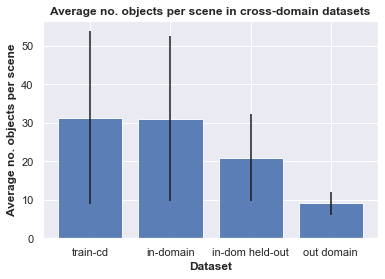

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 120 # iamge resolution
import seaborn as sns
sns.set_theme()

train_cd_mean, train_cd_std = count_mean_objs(train_cd_data)
indom_mean, indom_std = count_mean_objs(indom_data)
idho_mean, idho_std = count_mean_objs(idho_data)
ood_mean, ood_std = count_mean_objs(ood_data)

means = [train_cd_mean, indom_mean, idho_mean, ood_mean]
stds = [train_cd_std, indom_std, idho_std, ood_std]
names = ['train-cd', 'in-domain', 'in-dom held-out', 'out domain']
x_pos = np.arange(len(names))

fig, ax = plt.subplots()
ax.bar(x_pos, means, yerr=stds, alpha=0.9)
ax.set_xticks(x_pos)
ax.set_xticklabels(names)
ax.set_ylabel('Average no. objects per scene', weight='bold')
ax.set_xlabel('Dataset', weight='bold')
ax.set_title('Average no. objects per scene in cross-domain datasets', weight='bold')

plt.show()